In [3]:
%pwd

'C:\\AIWorkspace\\source_code\\BAF_LEARNING'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [3]:
import pandas as pd
data = pd.read_csv('./DATA/SeoulBikeData.csv',encoding='cp949')
# 파일 다운로드 경로를 미리 설정해두면 이름만 써도 됨
data.head()

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [42]:
# 한글 문제
# matplotlib의 기본 폰트에서 한글이 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   날짜        8760 non-null   object 
 1   대여횟수      8760 non-null   int64  
 2   시         8760 non-null   int64  
 3   온도        8760 non-null   float64
 4   습도        8760 non-null   int64  
 5   풍속        8760 non-null   float64
 6   가시성       8760 non-null   int64  
 7   이슬점       8760 non-null   float64
 8   태양 복사에너지  8760 non-null   float64
 9   강수량       8760 non-null   float64
 10  강설량       8760 non-null   float64
 11  계절        8760 non-null   object 
 12  휴무일여부     8760 non-null   object 
 13  작동여부      8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.3+ KB


날짜          0
대여횟수        0
시           0
온도          0
습도          0
풍속          0
가시성         0
이슬점         0
태양 복사에너지    0
강수량         0
강설량         0
계절          0
휴무일여부       0
작동여부        0
dtype: int64

,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부


C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.draw()
C:\Anaconda3\Lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) 

<Axes: >

C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 54943 (\N{HANGUL SYLLABLE HOES}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  func(*args, **kwargs)
C:\Anaconda3\Lib\site-packages\IPython\cor

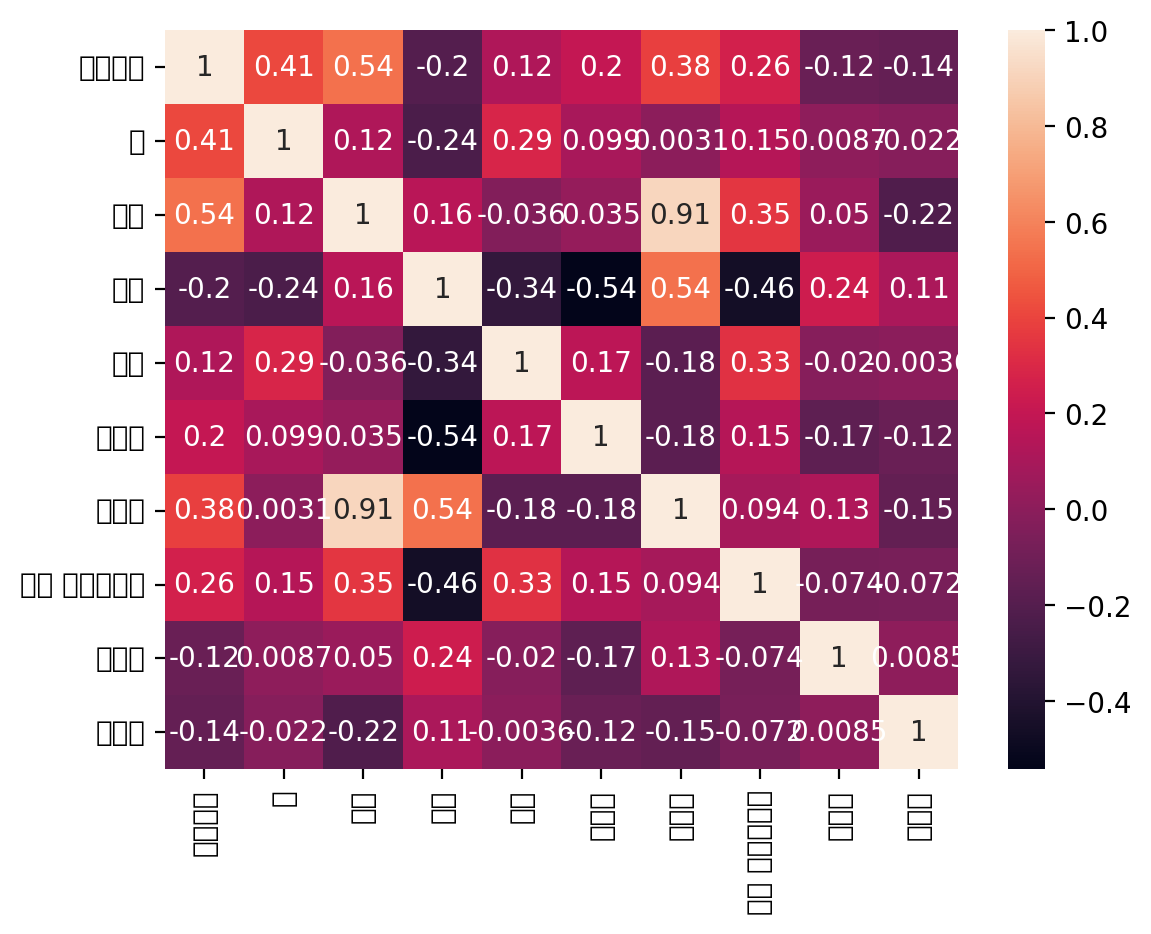

In [12]:
data.info() # 정보 확인
data.isnull().sum() # 결측치 없음
data[data.duplicated()] #중복행 확인
data_x=data._get_numeric_data()
sns.heatmap(data_x.corr(),annot=True)


In [5]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [59]:
# 열이름 한눈에 알아보기 쉽게 재설정
data.rename(columns={'Date':'날짜', 'Rented Bike Count':'대여횟수', 'Hour':'시', 'Temperature(캜)':'온도', 'Humidity(%)':'습도',
       'Wind speed (m/s)':'풍속', 'Visibility (10m)':'가시성', 'Dew point temperature(캜)':'이슬점',
       'Solar Radiation (MJ/m2)':'태양 복사에너지', 'Rainfall(mm)':'강수량', 'Snowfall (cm)':'강설량', 'Seasons':'계절',
       'Holiday':'휴무일여부', 'Functioning Day':'작동여부'}, inplace=True)

In [7]:
data

,날짜,대여횟수,시,온도,습도,풍속,가시성,이슬점,태양 복사에너지,강수량,강설량,계절,휴무일여부,작동여부
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [24]:
#계절에 따른 대여횟수 -> 여름/가을/봄/겨울 순
data.groupby('계절')['대여횟수'].sum().sort_values(ascending=False)

계절
Summer    2283234
Autumn    1790002
Spring    1611909
Winter     487169
Name: 대여횟수, dtype: int64

In [26]:
data['휴무여부'].value_counts()

휴무여부
No Holiday    8328
Holiday        432
Name: count, dtype: int64

<BarContainer object of 24 artists>

Text(0.5, 0, '시간별')

Text(0, 0.5, '대여횟수')

<Axes: xlabel='시', ylabel='대여횟수'>

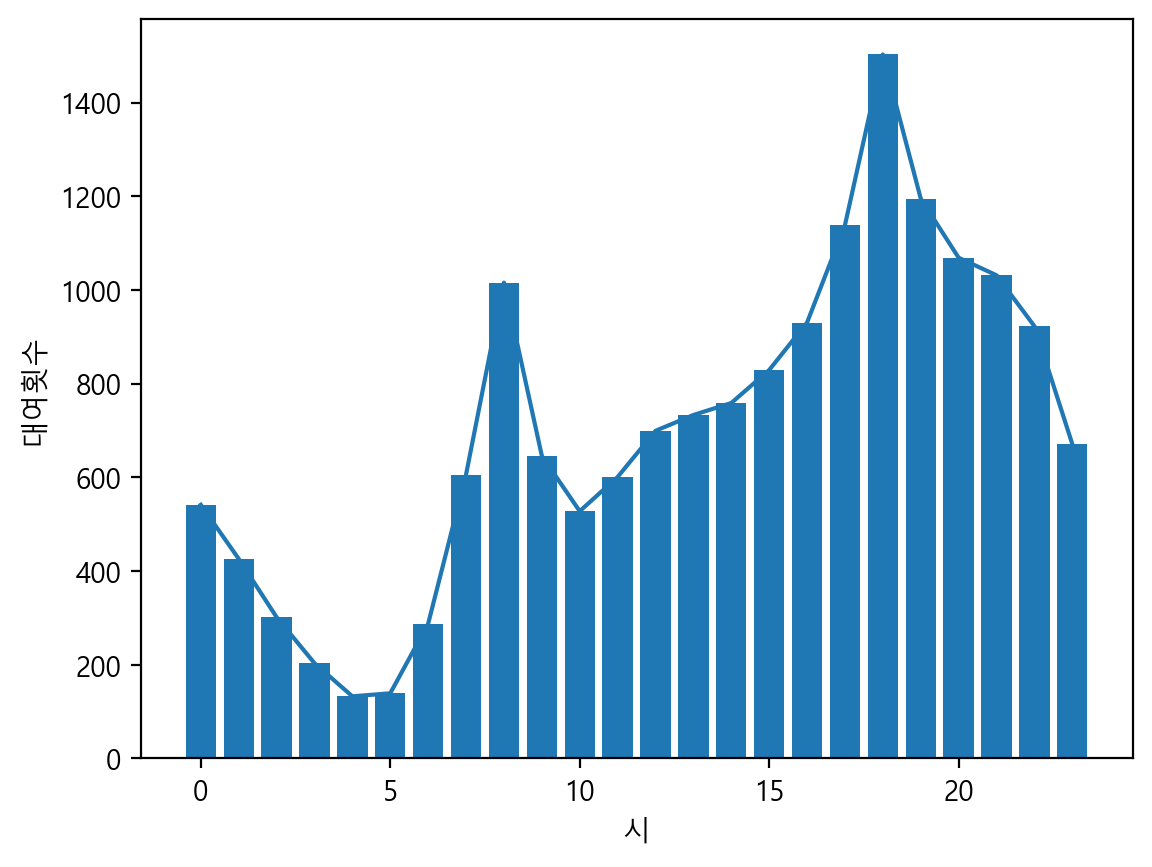

<Axes: ylabel='시'>

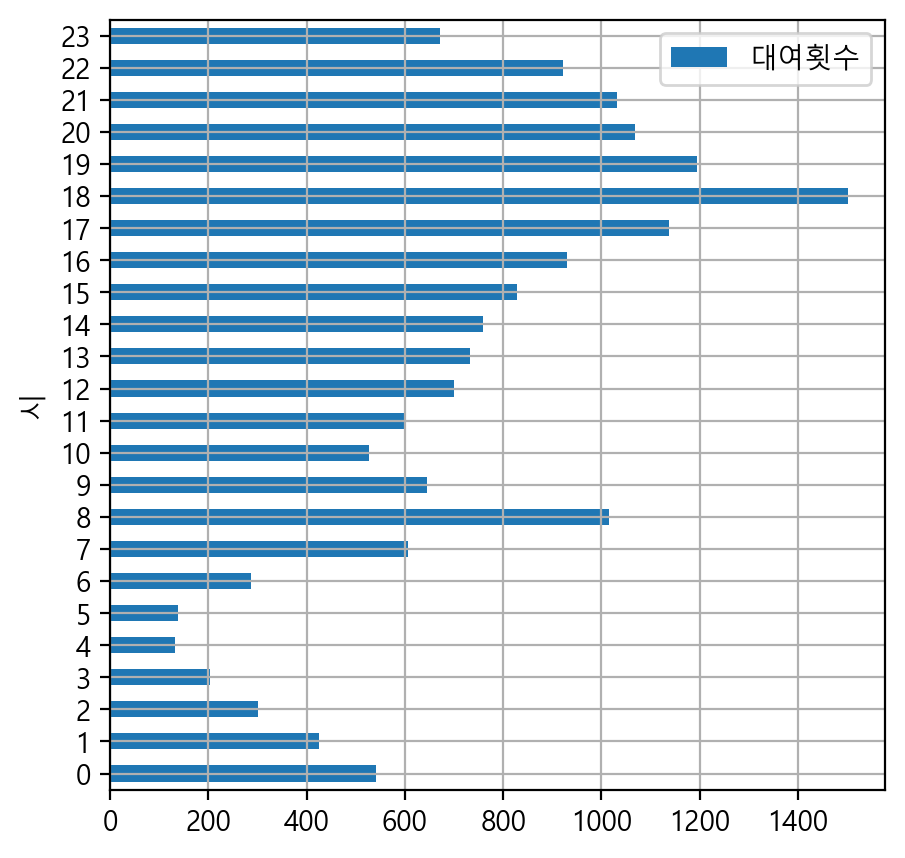

In [53]:
# # 시간에 따른 평균대여횟수
x=data.groupby('시')['대여횟수'].mean()
y=pd.pivot_table(data,'대여횟수',index=['시'])
plt.bar(x.index, x.values)
plt.xlabel('시간별')
plt.ylabel('대여횟수')
x.plot()
plt.show()

y.plot(kind='barh', grid=True, figsize=(5, 5))


<BarContainer object of 4 artists>

Text(0.5, 0, '계절')

Text(0, 0.5, '대여횟수')

<Axes: xlabel='계절', ylabel='대여횟수'>

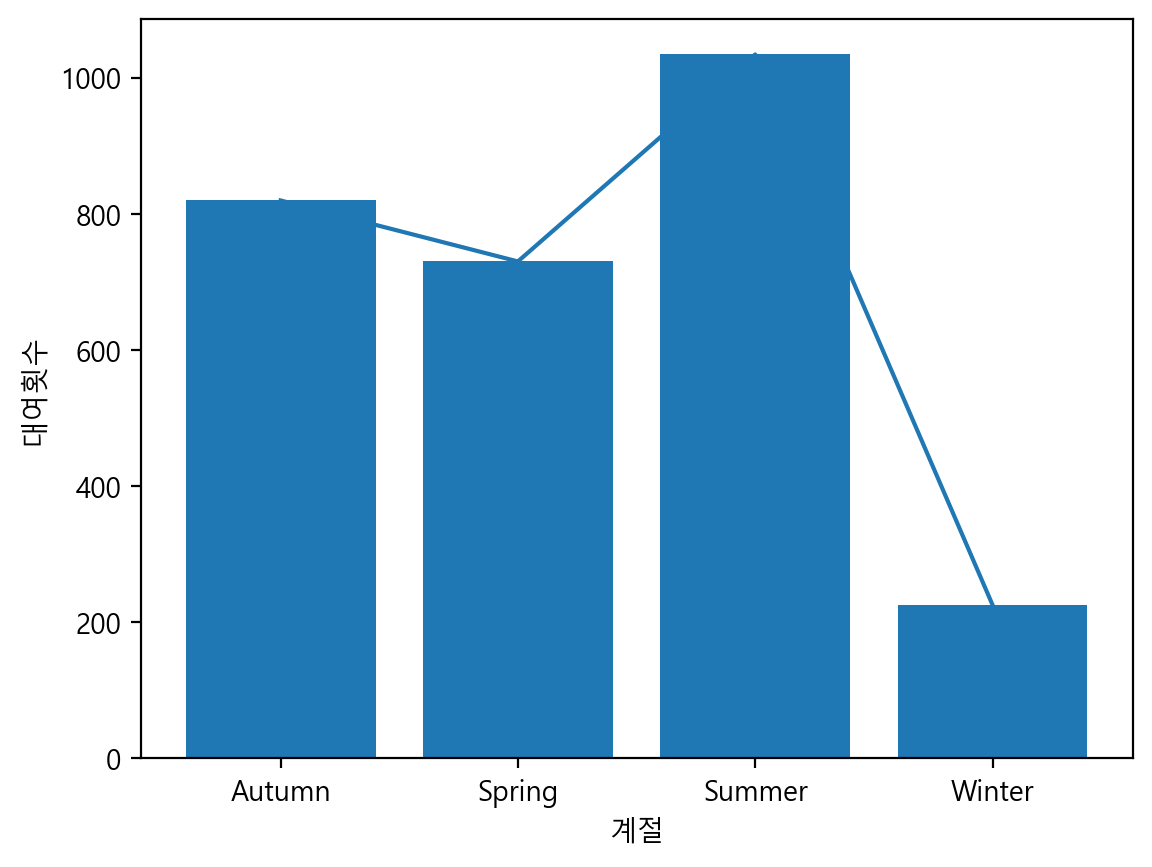

<Axes: xlabel='계절'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Autumn'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Winter')])

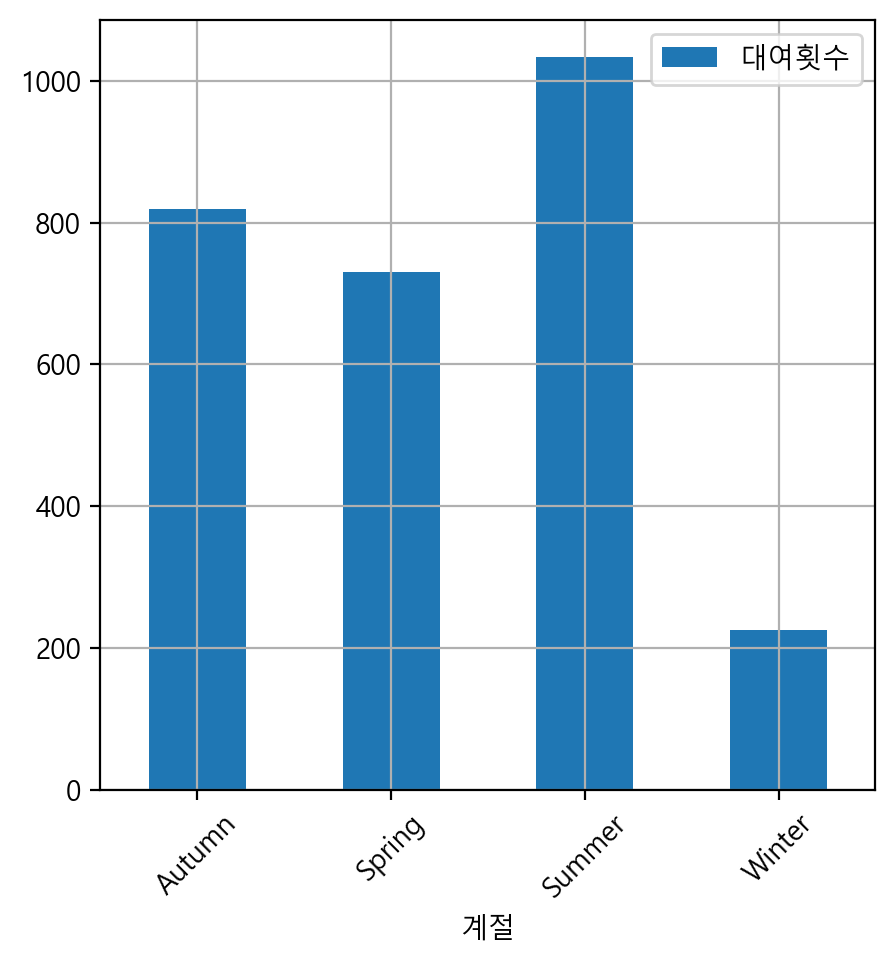

In [55]:
# 계절 따른 대여횟수 
x=data.groupby('계절')['대여횟수'].mean()
y=pd.pivot_table(data,'대여횟수',index=['계절'])
plt.bar(x.index, x.values)
plt.xlabel('계절')
plt.ylabel('대여횟수')
x.plot()
plt.show()

y.plot(kind='bar', grid=True, figsize=(5, 5))
plt.xticks(rotation=45)

In [73]:
# 휴무일여부에따른 작동여부 확인
data.groupby('휴무일여부')['작동여부'].value_counts()
data.pivot_table(index='휴무일여부',columns='작동여부',values='대여횟수',aggfunc='mean')

휴무일여부       작동여부
Holiday     Yes      408
            No        24
No Holiday  Yes     8057
            No       271
Name: count, dtype: int64

작동여부,No,Yes
휴무일여부,,
Holiday,0.0,529.154412
No Holiday,0.0,739.284970


,대여횟수
강수량,
0.0,739.311103
0.1,329.978261
0.2,185.300000
0.3,155.666667
0.4,134.187500
...,...
21.0,19.000000
21.5,596.000000
24.0,61.000000


,대여횟수
강설량,
0.0,732.272935
0.1,102.500000
0.2,242.866667
0.3,197.714286
0.4,284.809524
0.5,138.705882
0.6,185.000000
0.7,164.774194
0.8,256.000000


대여횟수
강설량 강수량            
0.0 0.0  768.412051
    0.1  344.000000
    0.2  206.812500
    0.3  187.500000
    0.4  155.923077
...             ...
5.1 1.1   62.000000
6.0 0.0  241.000000
7.0 1.8  167.000000
7.1 9.1   24.000000
8.8 0.0   88.000000

[126 rows x 1 columns]

<Axes: xlabel='강수량'>

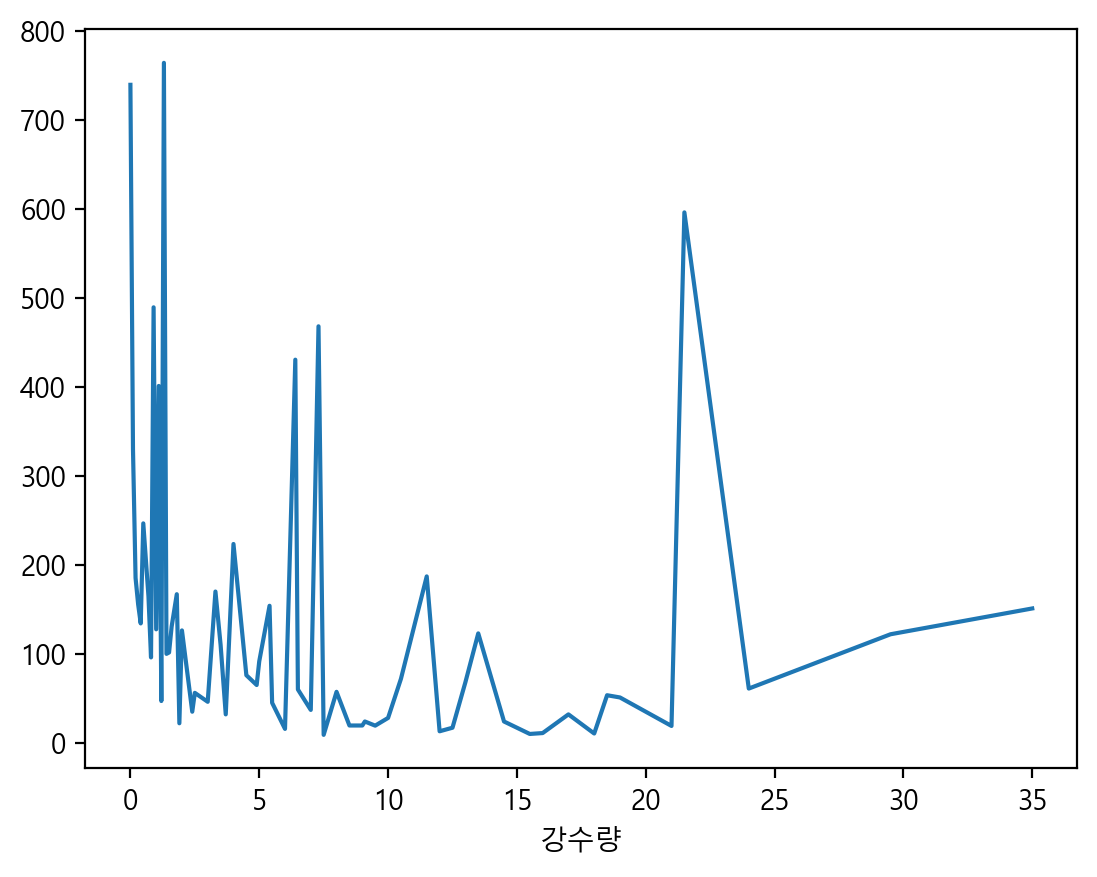

<Axes: xlabel='강설량'>

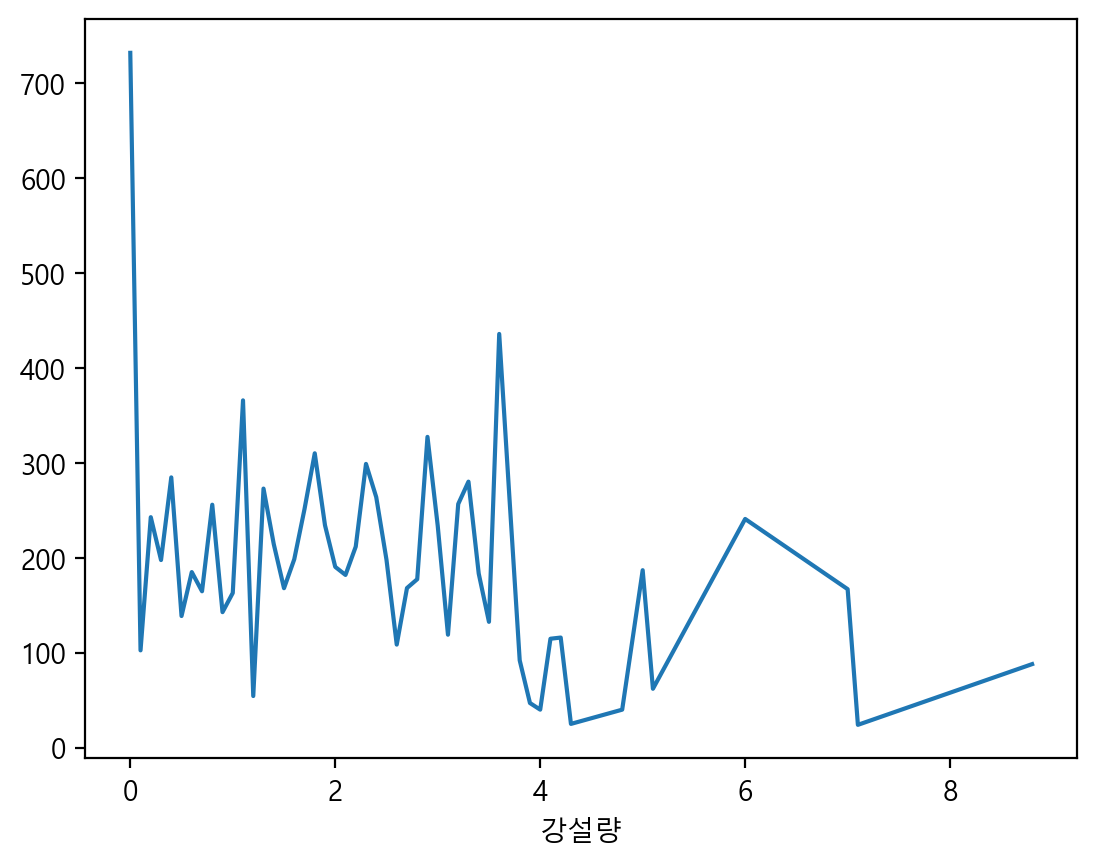

In [134]:
# 강수량 및 강설량에 따른 대여횟수 
x=data.groupby(['강수량'])['대여횟수'].mean()
y=data.groupby(['강설량'])['대여횟수'].mean()
pd.pivot_table(data,'대여횟수',index=['강수량'])
pd.pivot_table(data,'대여횟수',index=['강설량'])
pd.pivot_table(data,'대여횟수',index=['강설량','강수량'])

x.plot()
plt.show()
y.plot()

# 강수량,강설량과 이슬점간의 관계
# 작동여부의 기준 
# 태양 복사 에너지와 온도의 관계 
# 가시성의 상관계수 

,대여횟수
온도,
-17.8,322.0
-17.5,145.5
-17.4,64.0
-16.9,36.0
-16.5,96.0
...,...
38.0,1184.0
38.7,475.0
39.0,1033.0


,대여횟수
습도,
0,407.647059
10,1315.000000
11,1986.000000
12,2032.000000
13,1451.000000
...,...
94,253.129630
95,178.617647
96,170.828829


<Axes: xlabel='온도'>

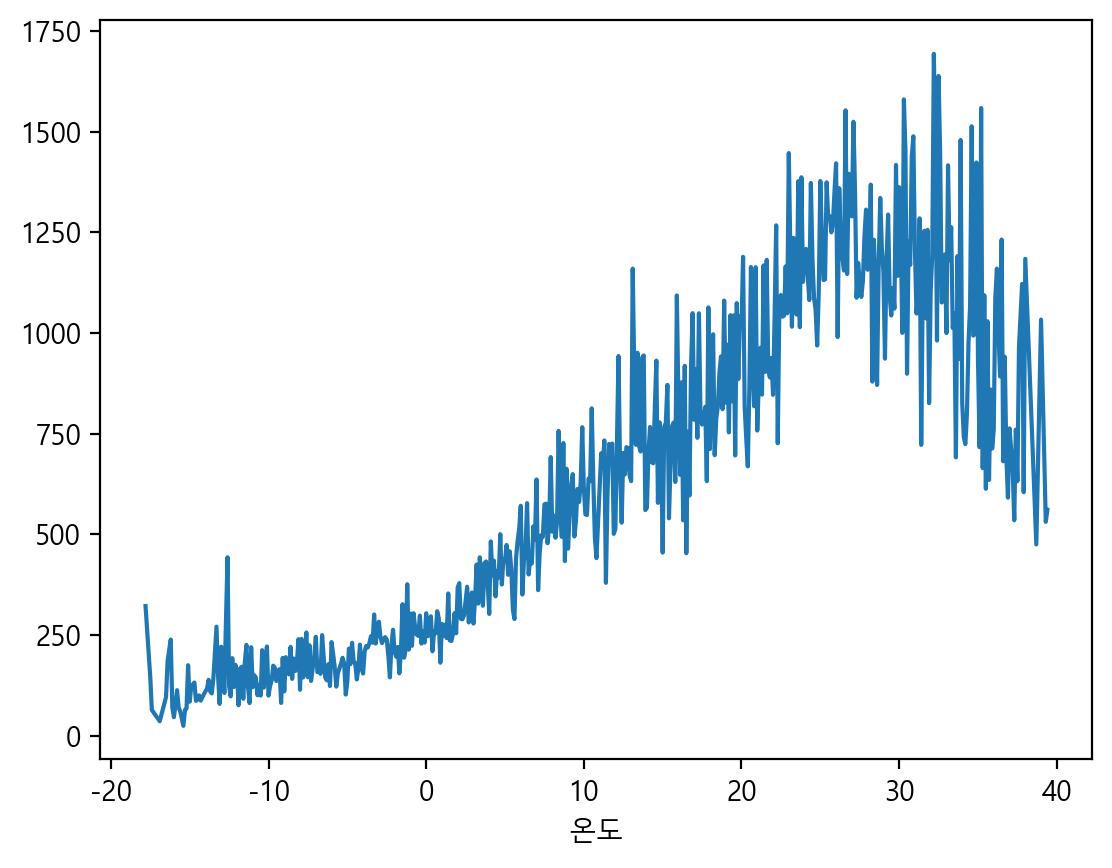

<Axes: xlabel='습도'>

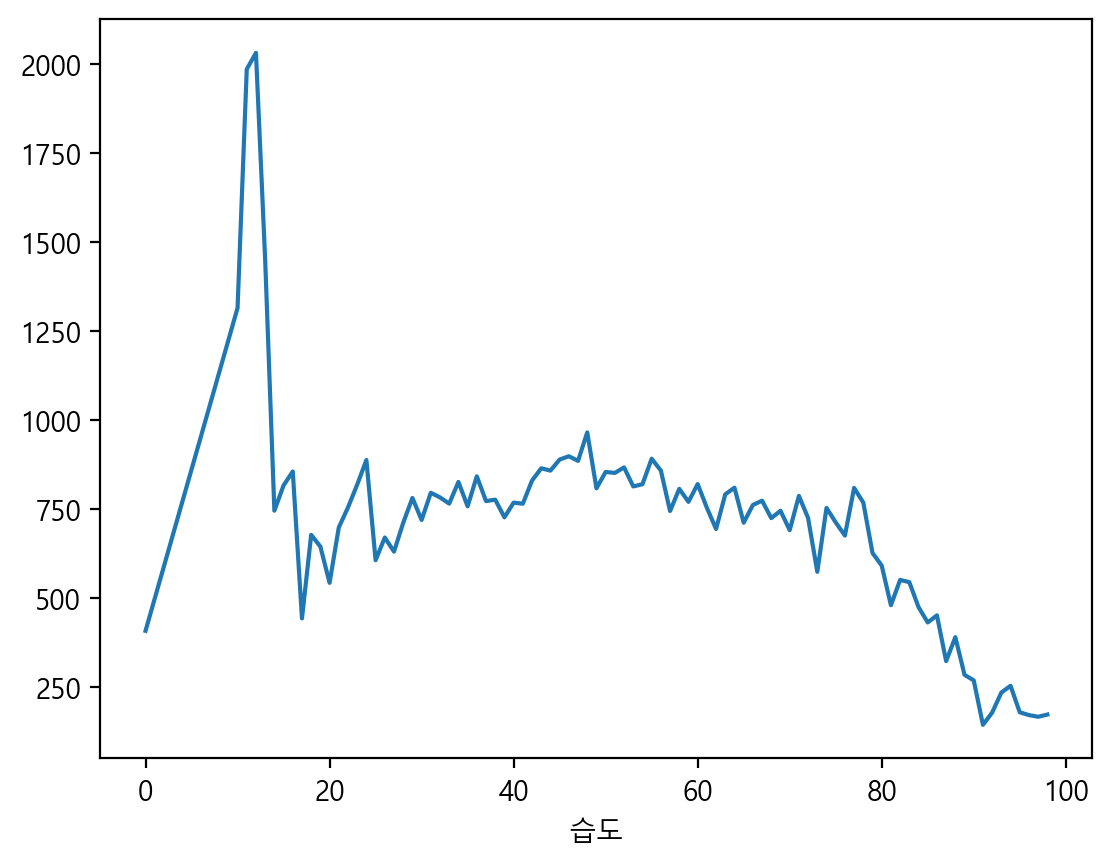

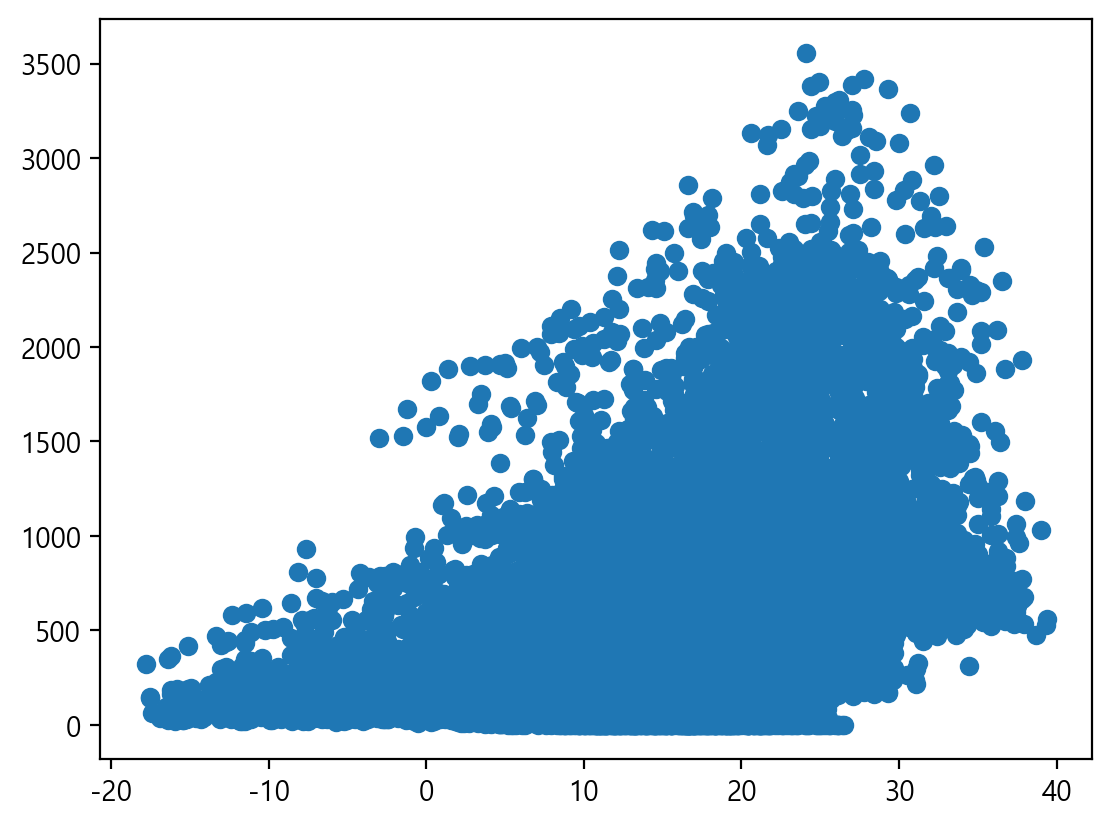

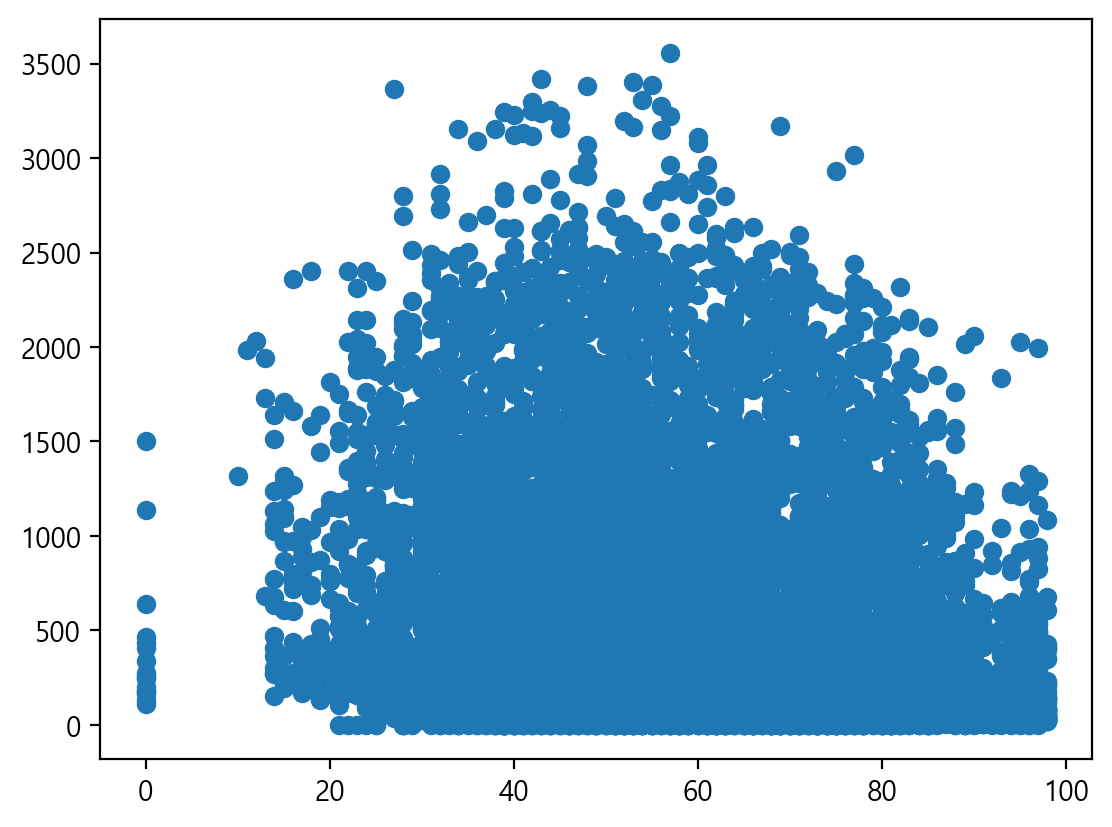

In [110]:

# 온도 및 습도에 따른 대여횟수
pd.pivot_table(data,'대여횟수',index=['온도'])
pd.pivot_table(data,'대여횟수',index=['습도'])
x=data.groupby(['온도'])['대여횟수'].mean()
y=data.groupby(['습도'])['대여횟수'].mean()

x.plot()
plt.show()
y.plot()
plt.show()

plt.scatter(data['온도'],data['대여횟수'])
plt.show()
plt.scatter(data['습도'],data['대여횟수'])

<Axes: xlabel='강수량'>

<Axes: xlabel='강설량'>

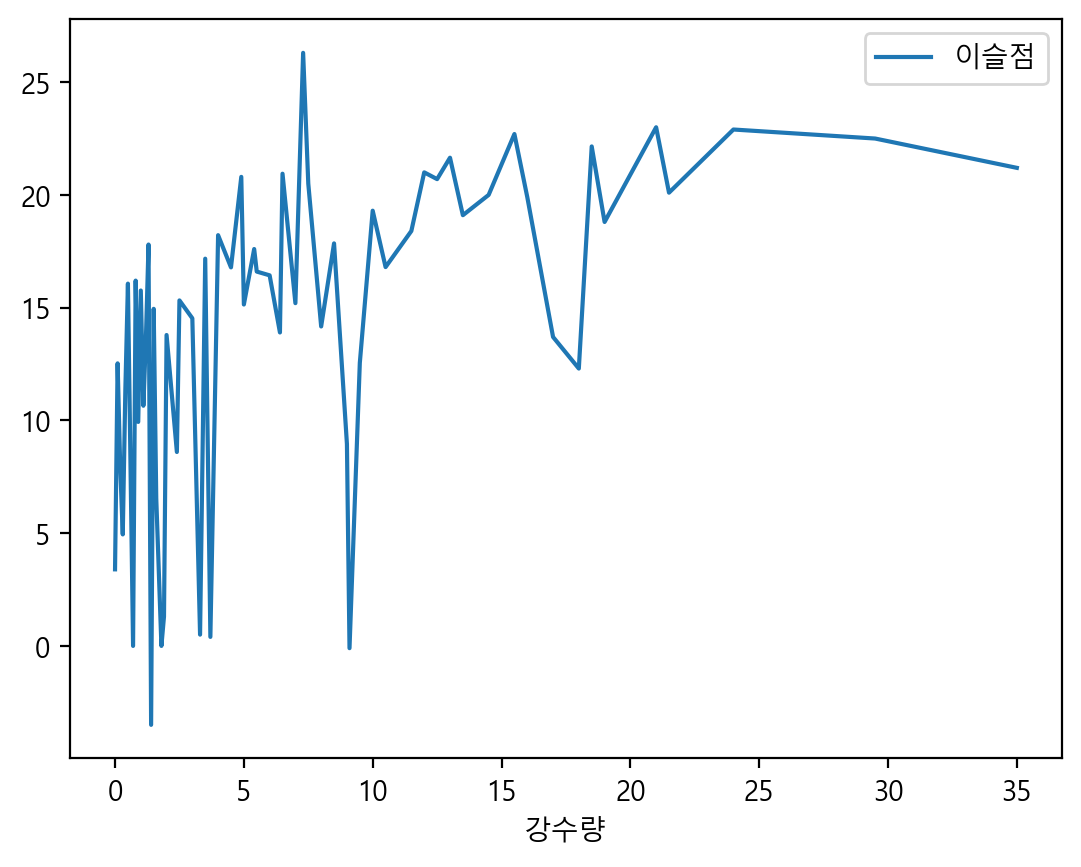

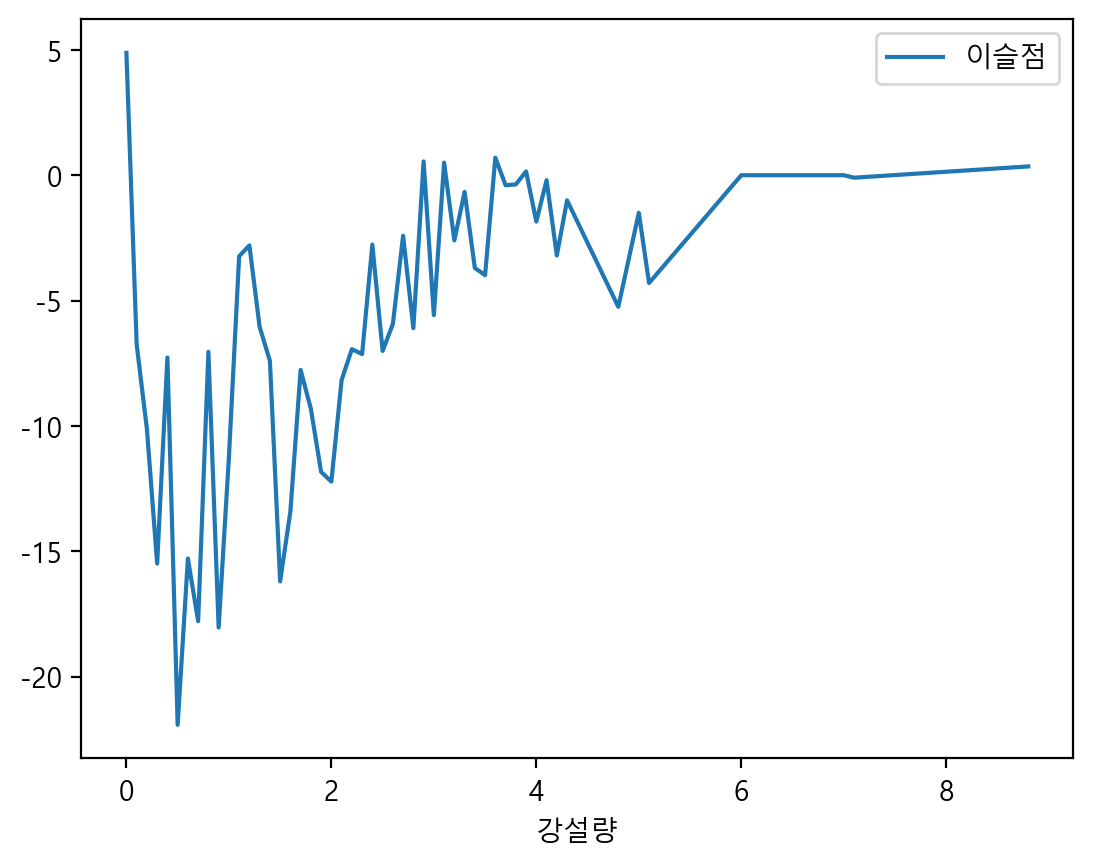

In [133]:
# 강수량,강설량과 이슬점간의 관계
# 이슬점이란? 
# 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
x=pd.pivot_table(data,'이슬점',index=['강수량'])
y=pd.pivot_table(data,'이슬점',index=['강설량'])


x.plot(kind='line')
y.plot(kind='line')
plt.show()
# 강설량및 강수량이 높아질수록 이슬점 또한 높아지고 있다. 




In [143]:
# 작동여부의 기준 

data['작동여부'].value_counts()

data.groupby('작동여부')['휴무일여부'].value_counts(normalize=True)
# 작동하지 않을때 휴무일인 경우가 더 많다. 


작동여부
Yes    8465
No      295
Name: count, dtype: int64

작동여부  휴무일여부     
No    No Holiday    0.918644
      Holiday       0.081356
Yes   No Holiday    0.951802
      Holiday       0.048198
Name: proportion, dtype: float64

태양 복사에너지
0.00    4300
0.01     128
0.02      82
0.03      69
0.06      61
        ... 
3.38       1
2.97       1
3.44       1
3.49       1
3.45       1
Name: count, Length: 345, dtype: int64

<Axes: xlabel='온도'>

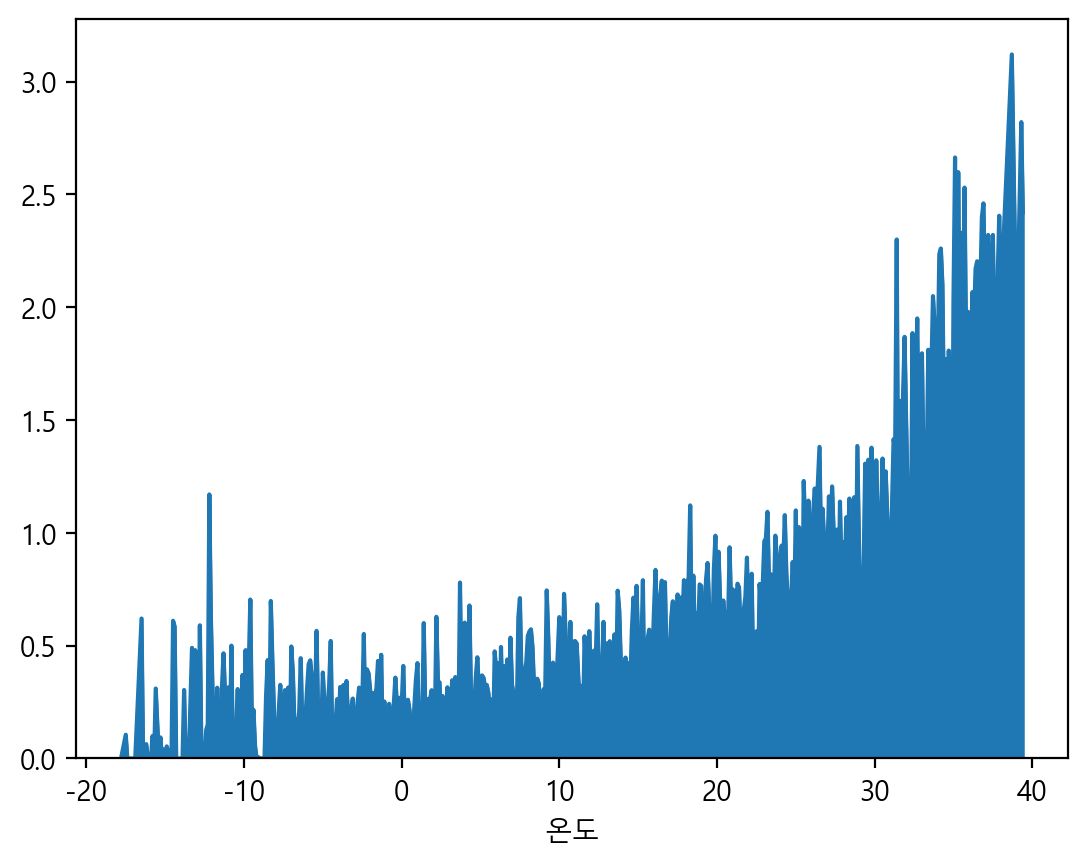

In [171]:
# 태양 복사 에너지와 온도의 관계 
data['태양 복사에너지'].value_counts()

x=data.groupby('온도')['태양 복사에너지'].mean()
y=pd.pivot_table(data,'태양 복사에너지',index=['온도'])

x.plot(kind='area')
# 온도가 높아질수록 태양 복사 에너지 높음 


가시성
2000    2245
1995      34
1985      28
1999      28
1989      28
        ... 
892        1
1656       1
1851       1
627        1
1688       1
Name: count, Length: 1789, dtype: int64

<Axes: xlabel='계절'>

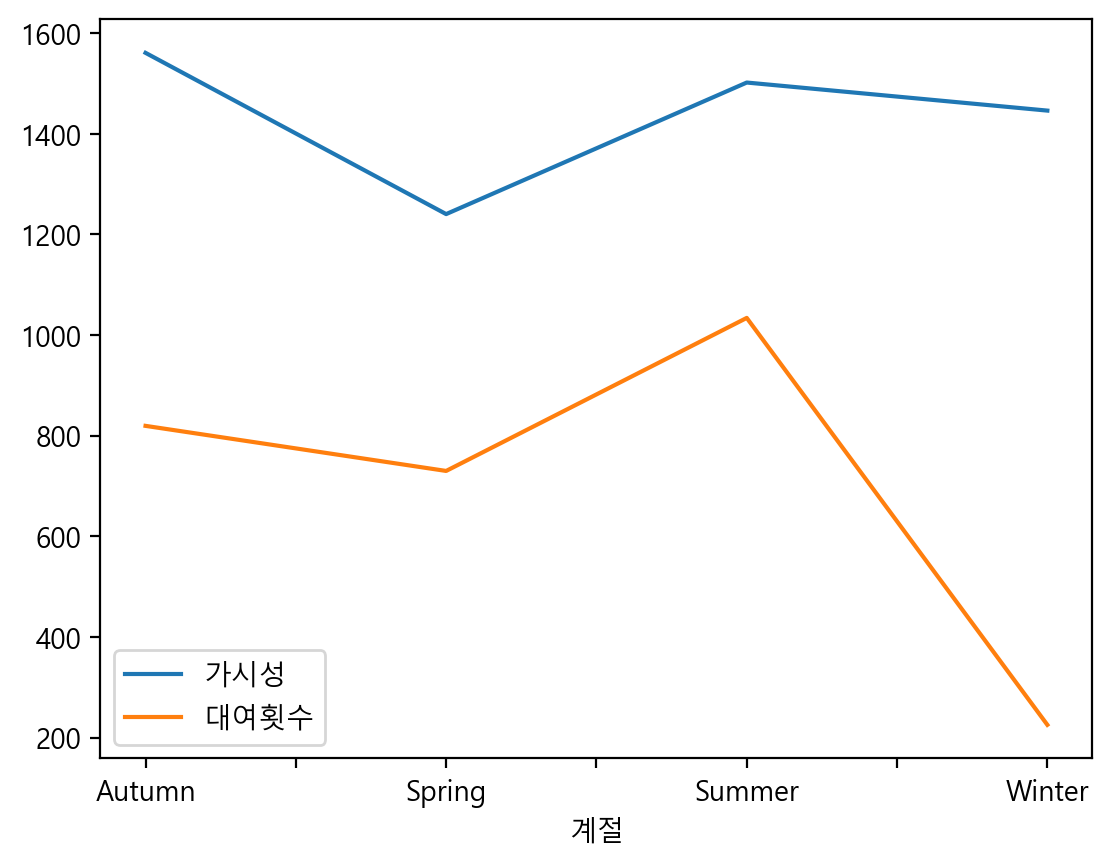

In [205]:
# 가시성의 상관계수 

data['가시성'].value_counts()

x=data.groupby('계절')[['가시성']].mean() # 봄에 가장 가시성 낮음 -황사및 미세먼지 때문일 것
y=data.groupby('계절')[['대여횟수']].mean() # 가시성이 대여횟수에도 영향 미침 
x= pd.merge(x,y, left_index=True, right_index=True)
x.plot()
